## PreProsessing

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('dataset/5. Patient Priority.csv')
df.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6962 non-null   int64  
 1   age                6962 non-null   float64
 2   gender             6961 non-null   float64
 3   chest pain type    6962 non-null   float64
 4   blood pressure     6962 non-null   float64
 5   cholesterol        6962 non-null   float64
 6   max heart rate     6962 non-null   float64
 7   exercise angina    6962 non-null   float64
 8   plasma glucose     6962 non-null   float64
 9   skin_thickness     6962 non-null   float64
 10  insulin            6962 non-null   float64
 11  bmi                6962 non-null   float64
 12  diabetes_pedigree  6962 non-null   float64
 13  hypertension       6962 non-null   float64
 14  heart_disease      6962 non-null   float64
 15  Residence_type     6962 non-null   object 
 16  smoking_status     6962 

In [4]:
df = df.drop(columns = ['Unnamed: 0', 'gender'])

In [5]:
#Memisahkan Kolom Numbers dan Kategori
numbers = df.select_dtypes(include = ['number']).columns
categories = df.select_dtypes(exclude = ['number']).columns

In [6]:
#Mendeskripsikan Kolom Numerik
round(df.describe(),2)

,age,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6962.00,6962.00,6962.00,6962.00,6962.00,6962.00,6962.00,6962.00,6962.00,6962.00,6962.00,6962.00,6962.00
mean,57.45,0.53,109.63,184.71,163.50,0.06,98.39,56.81,111.09,27.19,0.47,0.07,0.04
std,11.90,1.25,21.53,32.01,15.46,0.24,28.60,22.89,17.47,7.36,0.10,0.26,0.19
min,28.00,0.00,60.00,150.00,138.00,0.00,55.12,21.00,81.00,10.30,0.08,0.00,0.00
25%,48.00,0.00,92.00,164.00,150.00,0.00,78.71,36.00,97.00,21.80,0.47,0.00,0.00
50%,56.00,0.00,111.00,179.00,163.00,0.00,93.00,55.00,111.00,26.20,0.47,0.00,0.00
75%,66.00,0.00,127.00,192.00,177.00,0.00,111.63,77.00,125.00,31.00,0.47,0.00,0.00
max,82.00,4.00,165.00,294.00,202.00,1.00,199.00,99.00,171.00,66.80,2.42,1.00,1.00


In [7]:
#Mendeskripsikan Kolom Kategori
df[categories].describe(include='all')

,Residence_type,smoking_status,triage
count,6962,6962,6552
unique,2,4,4
top,Urban,never smoked,yellow
freq,4449,3745,5637


In [8]:
#Melihat Jumlah Baris Yang Kosong
df.isna().sum()

age                    0
chest pain type        0
blood pressure         0
cholesterol            0
max heart rate         0
exercise angina        0
plasma glucose         0
skin_thickness         0
insulin                0
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
Residence_type         0
smoking_status         0
triage               410
dtype: int64

In [9]:
#Melihat Jumlah duplikasi baris setiap kolom
df.duplicated().sum()

np.int64(0)

## EDA 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

Distribusi Usia Pasien

Tujuan: Mengetahui mayoritas kelompok usia pasien

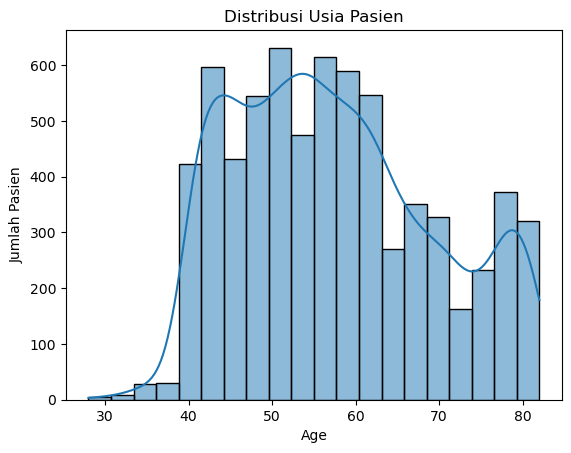

In [11]:
plt.figure()
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Age')
plt.ylabel('Jumlah Pasien')
plt.show()

Hubungan Usia vs Kolesterol

Tujuan: Melihat pola risiko seiring bertambahnya usia

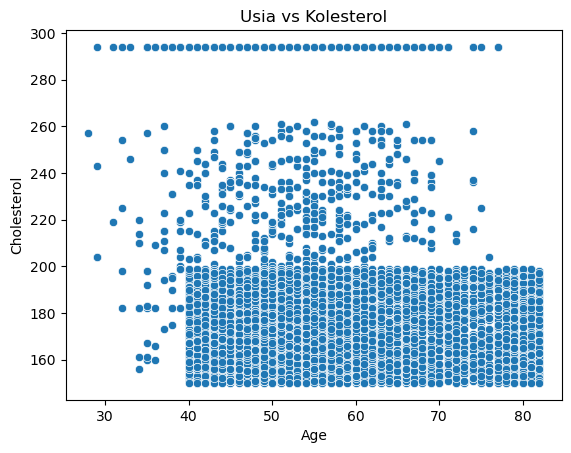

In [12]:
plt.figure()
sns.scatterplot(
    x=df['age'],
    y=df['cholesterol']
)
plt.title('Usia vs Kolesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


BMI vs Plasma Glucose

Tujuan: Indikasi risiko diabetes

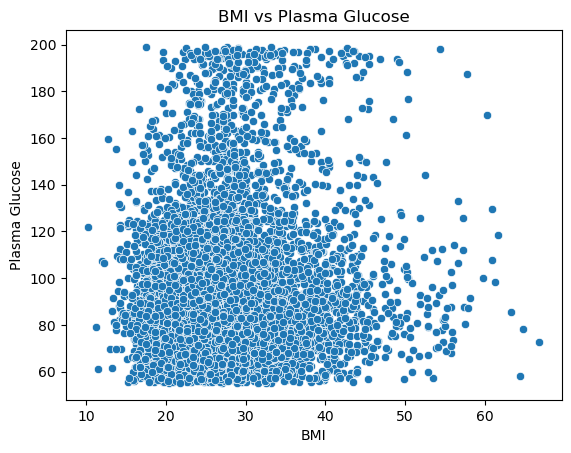

In [13]:
plt.figure()
sns.scatterplot(
    x=df['bmi'],
    y=df['plasma glucose']
)
plt.title('BMI vs Plasma Glucose')
plt.xlabel('BMI')
plt.ylabel('Plasma Glucose')
plt.show()


Korelasi Antar Variabel Medis

Tujuan: Menentukan fitur yang relevan untuk clustering

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[numbers + ['age']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()


TypeError: can only concatenate str (not "list") to str

<Figure size 1000x600 with 0 Axes>

Distribusi Penyakit (Hypertension & Heart Disease)

Tujuan: Mengetahui proporsi kondisi serius

## Deteksi Outlier

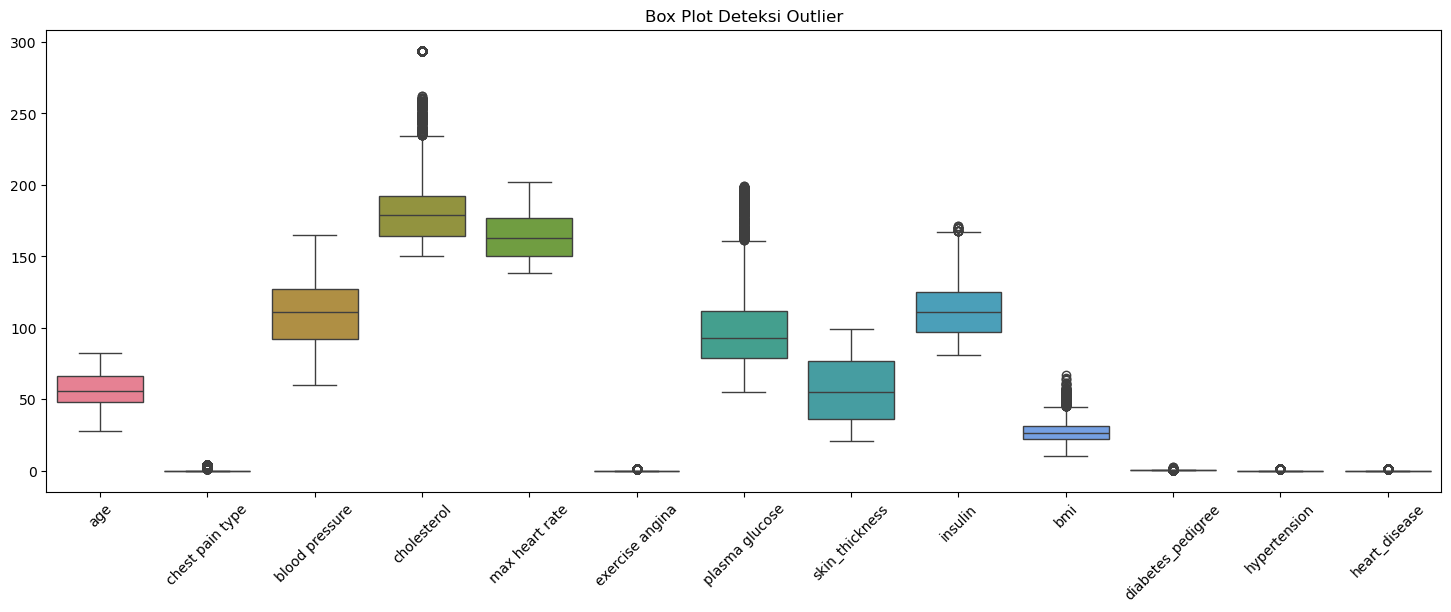

In [15]:
#Deteksi Outlier
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.figure(figsize=(18,6))
sns.boxplot(data=df[numbers])
plt.title('Box Plot Deteksi Outlier')
plt.xticks(rotation=45)
plt.show()

## Pemilihan Feature

Pemilihan yang bermakna secara medis

In [16]:
features = [
    'age',
    'blood pressure',
    'cholesterol',
    'plasma glucose',
    'bmi',
    'max heart rate',
    'hypertension',
    'heart_disease'
]
X = df[features]

X.head()

,age,blood pressure,cholesterol,plasma glucose,bmi,max heart rate,hypertension,heart_disease
0,40.0,140.0,294.0,108.0,19.0,172.0,0.0,0.0
1,49.0,160.0,180.0,75.0,18.0,156.0,0.0,0.0
2,37.0,130.0,294.0,98.0,23.0,156.0,0.0,0.0
3,48.0,138.0,214.0,72.0,18.0,156.0,0.0,0.0
4,54.0,150.0,195.0,108.0,21.0,156.0,0.0,0.0


## Standarisasi

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[-1.46588359,  1.41037372,  3.4144122 , ...,  0.54973396,
        -0.27756455, -0.20279194],
       [-0.7098411 ,  2.33916747, -0.14719073, ..., -0.48535673,
        -0.27756455, -0.20279194],
       [-1.71789775,  0.94597684,  3.4144122 , ..., -0.48535673,
        -0.27756455, -0.20279194],
       ...,
       [ 1.97830997,  0.80665778,  0.00901992, ..., -1.45575425,
        -0.27756455, -0.20279194],
       [-0.54183166,  0.62089903, -0.74079122, ..., -0.09719772,
        -0.27756455, -0.20279194],
       [-1.1298647 ,  0.7137784 , -0.27215926, ...,  0.54973396,
        -0.27756455, -0.20279194]])

## Pemodelan

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #Mengambil 2 komponen utama
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [20]:
pcs = pca.transform(X_scaled)

df_pca = pd.DataFrame(data = pcs, columns = [ 'PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,3.303321,0.236473
1,1.961967,0.701041
2,3.162692,0.103909
3,2.180730,0.393787
4,1.605579,0.660450


In [21]:
pca.explained_variance_ratio_

array([0.20483972, 0.16354392])

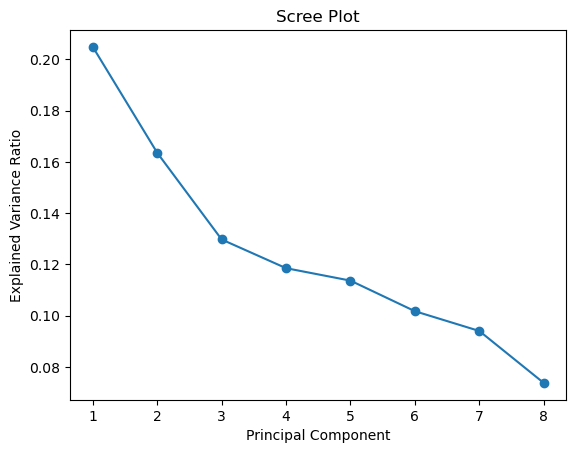

In [22]:
import matplotlib.pyplot as plt

pca_full = PCA()
pca_full.fit(X_scaled)
expl_var = pca_full.explained_variance_ratio_

plt.plot(range(1, len(expl_var)+1), expl_var, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

## Tuning Hyperparameter

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
#List untuk menyimpan hasil
k_values = []
silhouette_values = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state = 42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)

    k_values.append(k)
    silhouette_values.append(score)

#Membuat tabel
df_scores = pd.DataFrame({
    'k' : k_values,
    'Silhouette Score' : silhouette_values})

df_scores

,k,Silhouette Score
0,2,0.374679
1,3,0.221608
2,4,0.250834
3,5,0.192360
4,6,0.194962
5,7,0.196888
6,8,0.196370
7,9,0.197476
8,10,0.192959


## Pemodelan kedua

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

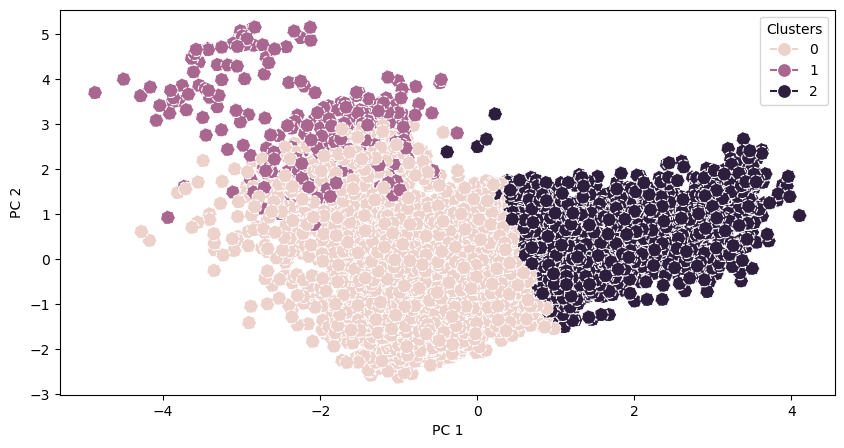

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import math 

df_pca['Clusters'] = kmeans.fit_predict(X_scaled)

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(x='PC 1', y='PC 2',
                hue='Clusters', #Untuk memberi warna terhadap visualisasi
                linestyle='--',
                data=df_pca,
                s=100,
                ax=ax)
plt.show()

## Evaluasi

In [28]:
df.groupby('Cluster')[features].mean()

,age,blood pressure,cholesterol,plasma glucose,bmi,max heart rate,hypertension,heart_disease
Cluster,,,,,,,,
0,57.929908,102.294347,173.338952,99.281026,29.273299,165.966906,0.088386,0.0
1,68.472727,109.978182,175.105455,103.578109,30.388364,164.480000,0.232727,1.0
2,54.504940,129.164654,216.526894,95.244144,21.148024,156.774424,0.002195,0.0


In [30]:
df['Cluster'].value_counts().to_frame().reset_index().rename(columns={'index': 'clusters', 'Cluster': 'total_members'})

,total_members,count
0,0,4865
1,2,1822
2,1,275


In [6]:
df_clean = df.copy()
df_clean.to_csv("data_miniproject5_Patient_Priority.csv", index = False)